In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import glob
import plotly.graph_objects as go
import numpy as np

from plotly.graph_objs import *
import pandas as pd
import plotly.express as px

In [77]:
'''
UMAP representation of the morphology
'''
import plotly.graph_objects as go
from plotly.graph_objs import *
import pandas as pd
import plotly.express as px
import os

from sklearn.neighbors import NearestNeighbors
from numpy import linalg as LA

usecols = (1,2,3, 4, 5, 6, 7, 8)

embedding_filename = '/home/garner1/wsi-data/npy/id'+str(39)+'_clusterable_embedding.morphology.npy'
embedding = np.load(embedding_filename, allow_pickle=True)

sample_size = 100000
subidx = np.random.randint(embedding.shape[0], size=sample_size)

sub_embedding = embedding[subidx,:]
df_embedding = pd.DataFrame(data=sub_embedding, columns=['x','y','z'])


In [83]:
nbrs = NearestNeighbors(n_neighbors=500, algorithm='kd_tree').fit(sub_embedding)
distances, indices = nbrs.kneighbors(sub_embedding)

In [84]:
eigvals = [LA.eigvalsh(np.cov(sub_embedding[indices[idx,:],:].T)) for idx in range(sub_embedding.shape[0])]

In [85]:
curvatures = [min(eigvals[idx])/sum(eigvals[idx]) for idx in range(len(eigvals))]

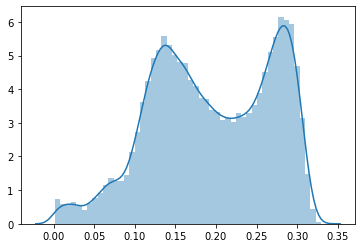

In [86]:
import seaborn as sns
sns.distplot(curvatures)
plt.show()

In [87]:
'''
UMAP representation of the morphology
'''
df_embedding['curvature'] = curvatures

fig = px.scatter_3d(df_embedding, 
                    x="x", y="y", z="z", 
                    color="curvature", 
                    hover_name="curvature", 
                    color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=1,opacity=0.5),selector=dict(mode='markers'))

fig.write_html('test.html', auto_open=True)

In [46]:
'''
UMAP representation of the morphology
'''
df_embedding['curvature'] = curvatures

df = df_embedding[df_embedding['curvature']>=0.3]
#df = df[df['curvature']<=0.2]

fig = px.scatter_3d(df, 
                    x="x", y="y", z="z", 
                    hover_name="curvature", 
                    )

fig.update_traces(marker=dict(size=1,opacity=0.5),selector=dict(mode='markers'))

fig.write_html('test.html', auto_open=True)